In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import wrangle as w

### Acquire the data

In [2]:
df = w.acquire_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        1305 non-null   datetime64[ns]
 1   JPYEN       1247 non-null   float64       
 2   HKD         1247 non-null   float64       
 3   CHYUAN      1247 non-null   float64       
 4   KRWON       1247 non-null   float64       
 5   SPD         1247 non-null   float64       
 6   TWD         1247 non-null   float64       
 7   THB         1247 non-null   float64       
 8   USD_Index   1245 non-null   float64       
 9   USD_Actual  1305 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 112.1 KB


In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        1244 non-null   datetime64[ns]
 1   JPYEN       1244 non-null   float64       
 2   HKD         1244 non-null   float64       
 3   CHYUAN      1244 non-null   float64       
 4   KRWON       1244 non-null   float64       
 5   SPD         1244 non-null   float64       
 6   TWD         1244 non-null   float64       
 7   THB         1244 non-null   float64       
 8   USD_Index   1244 non-null   float64       
 9   USD_Actual  1244 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 106.9 KB


### Explore the data

#### Observing each variable against the usd from 2017-2022

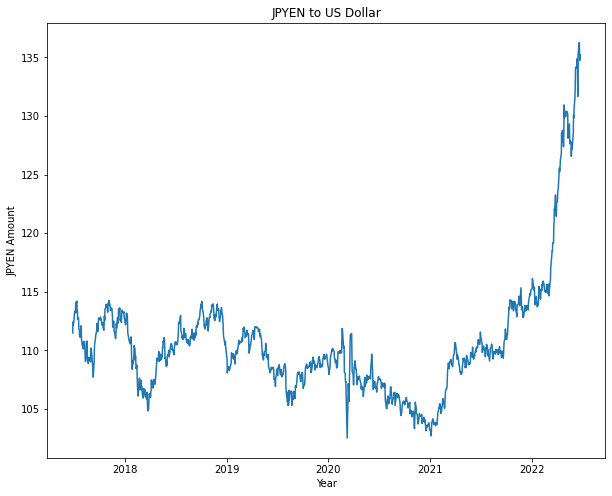

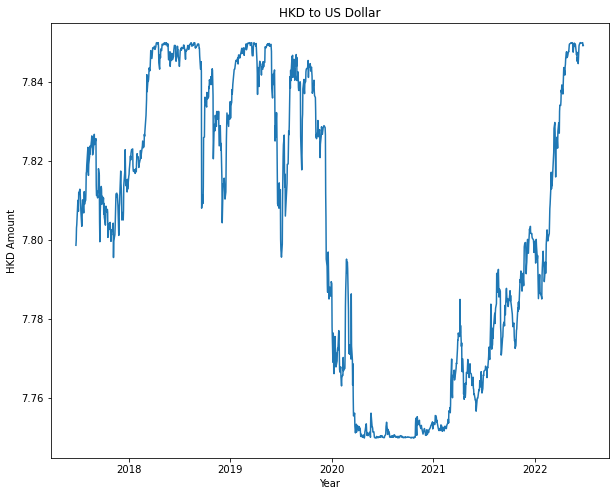

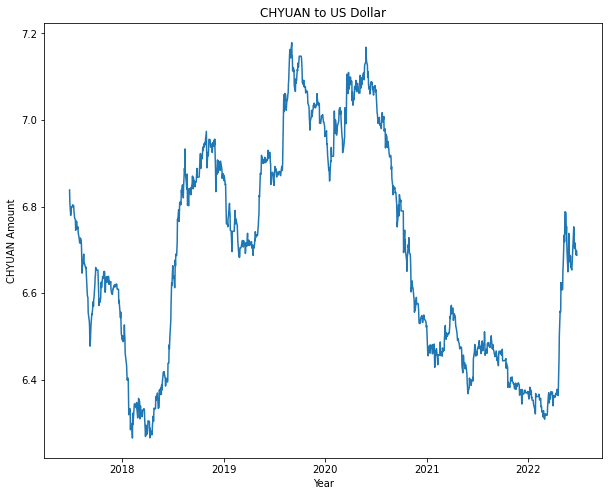

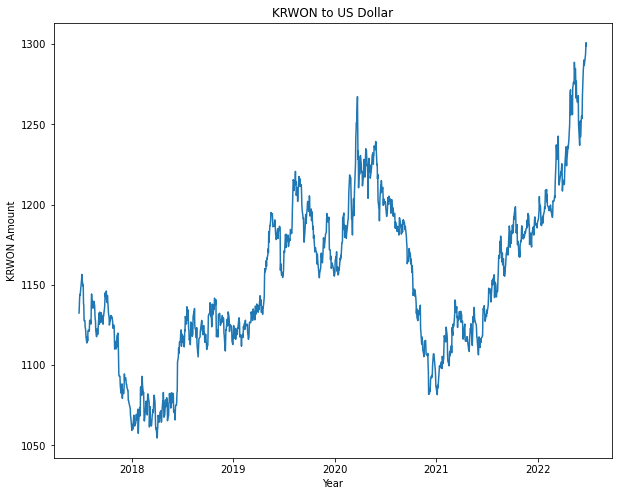

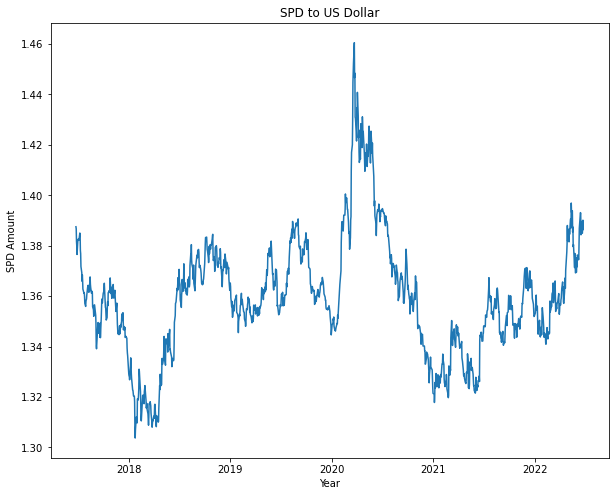

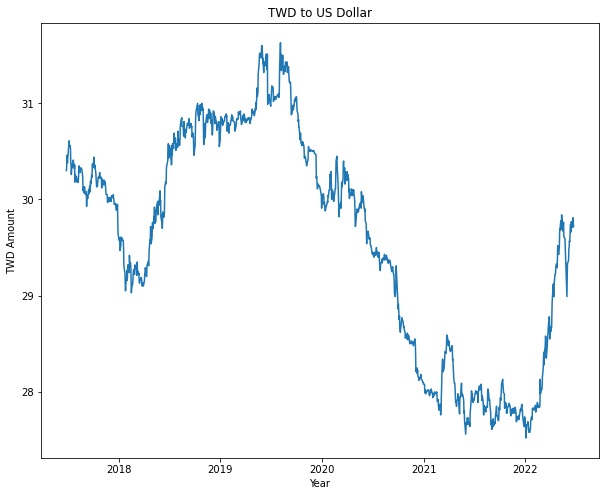

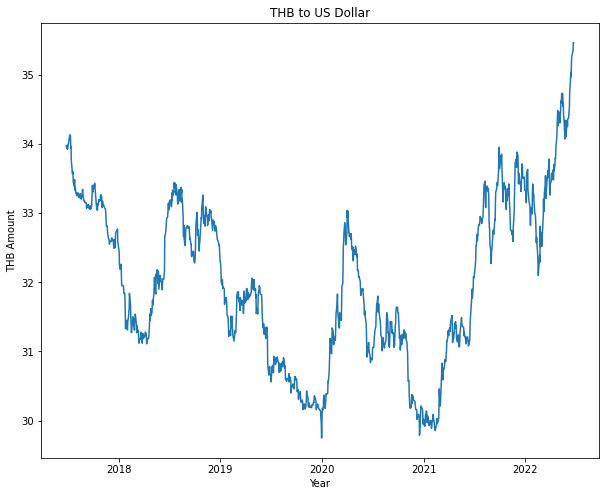

In [8]:
for col in df.columns[1:8]:
    plt.figure(figsize=(10,8))
    sns.lineplot(x='DATE', y=col, data=df)
    plt.title(f'{col} to US Dollar')
    plt.xlabel('Year')
    plt.ylabel(f'{col} Amount')
    plt.show()

## Moving forward I will be conducting a time-series analysis 

### Train/Test Split

In [9]:
train_size = 0.70 # 70% train, 30% test
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # Everything up to but not including the test_start_index
test = df[test_start_index:] # Everything from the test_start_index to the end

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 915
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        871 non-null    datetime64[ns]
 1   JPYEN       871 non-null    float64       
 2   HKD         871 non-null    float64       
 3   CHYUAN      871 non-null    float64       
 4   KRWON       871 non-null    float64       
 5   SPD         871 non-null    float64       
 6   TWD         871 non-null    float64       
 7   THB         871 non-null    float64       
 8   USD_Index   871 non-null    float64       
 9   USD_Actual  871 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 74.9 KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 916 to 1304
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        373 non-null    datetime64[ns]
 1   JPYEN       373 non-null    float64       
 2   HKD         373 non-null    float64       
 3   CHYUAN      373 non-null    float64       
 4   KRWON       373 non-null    float64       
 5   SPD         373 non-null    float64       
 6   TWD         373 non-null    float64       
 7   THB         373 non-null    float64       
 8   USD_Index   373 non-null    float64       
 9   USD_Actual  373 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 32.1 KB


#### Visualizing Splits

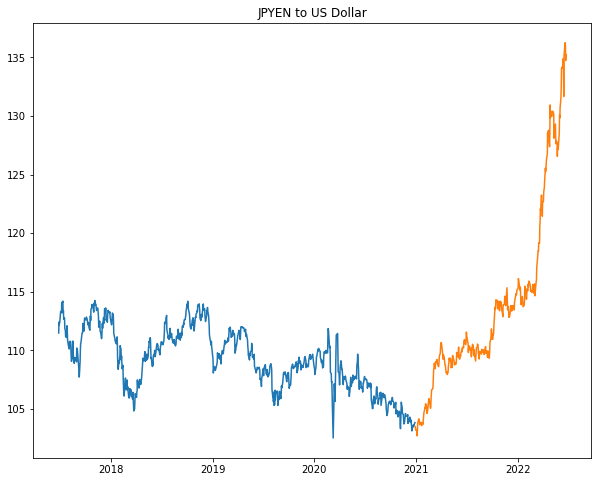

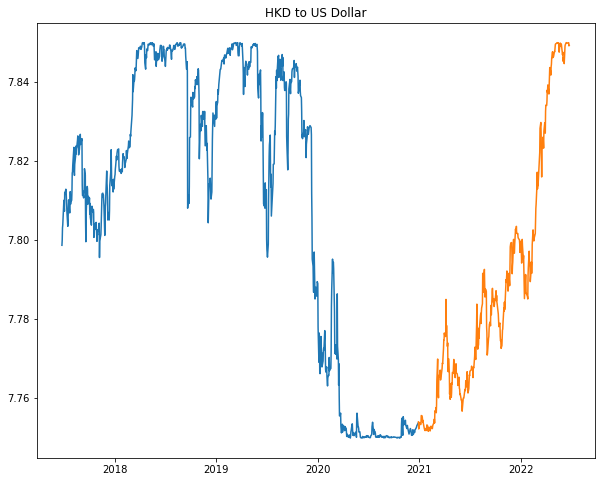

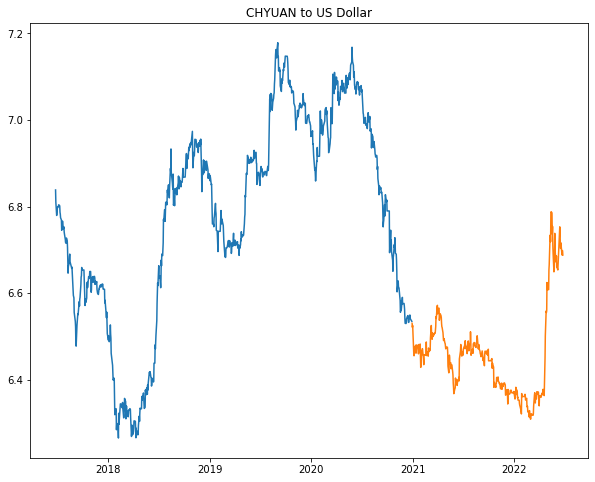

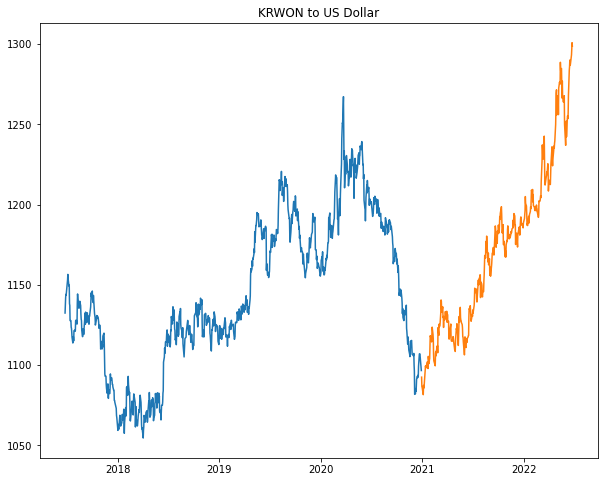

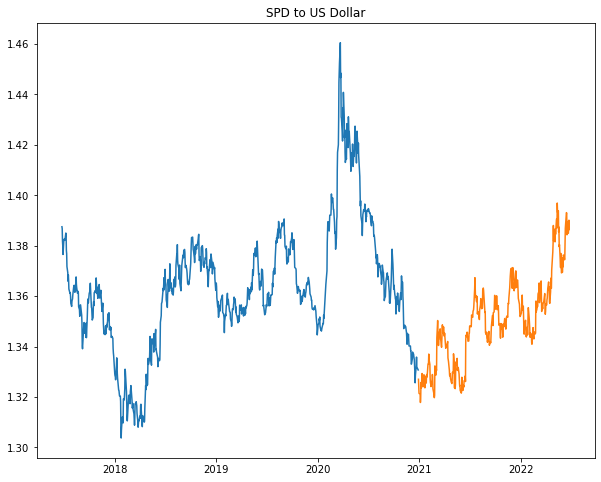

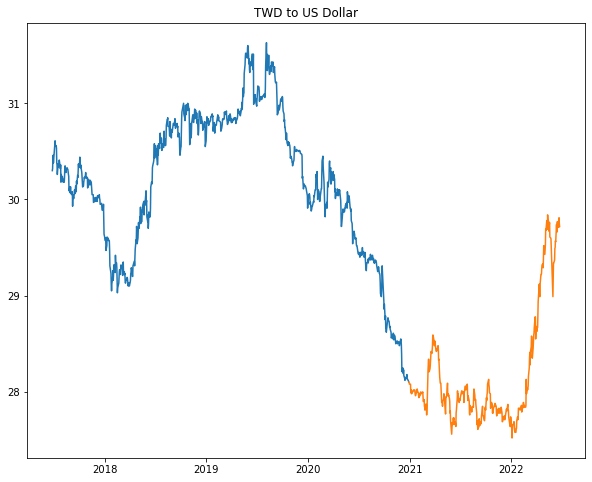

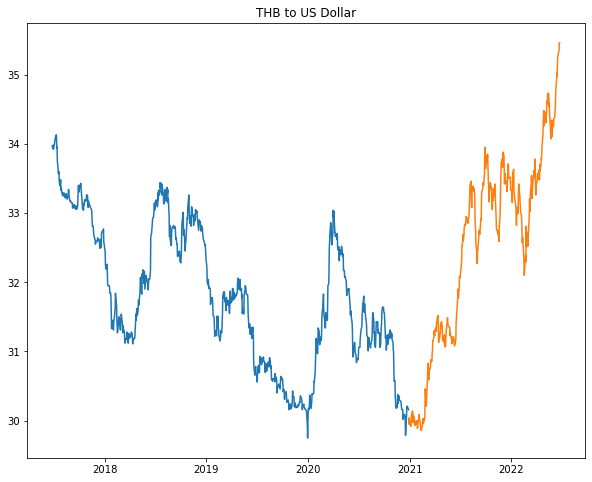

In [12]:
for col in train.columns[1:8]:
    # Japan Yen Train/Test
    plt.figure(figsize=(10,8))
    plt.title(f'{col} to US Dollar')
    plt.plot(train.DATE, train[col])
    plt.plot(test.DATE, test[col])
    plt.show()